<a href="https://colab.research.google.com/github/anamunoz01/AA_PRACTICA2_GRUPO_10/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 2**

GRUPO 10

Elena Gómez

Ana Muñoz

## **Objetivo**

El  objetivo  de  esta  práctica  es  diseñar,  configurar  y  entrenar  un  modelo  de  Redes  de Neuronas Convolucionales. 

Crearemos un modelo  de Red  de  Neuronas  Convolucionales  que  sea  capaz  de  reconocer  y clasificar imágenes  de  ropa  en  sus  diferentes  tipologías.  Este  modelo  será  definido, 
configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  

Usaremos el conjunto de datos Fashion-MNIST, precargado en Keras.
Fashion-MNIST  es  un  conjunto  de  datos  de  las  imágenes  de  los  artículos  de  Zalando. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías.  Estas  imágenes  muestran  prendas  individuales  de  ropa  en  baja  resolución (28 x 28 píxeles)

Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes

- Importamos tensorflow y comprobamos que la versión es 2.0.0 o superior 



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

2.7.0


- **Datos Fashion-MNIST**

 A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que a cada posición se le asigna el nombre de cada prenda. ('class_names')


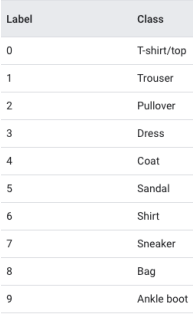

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


-  **Estudio de datos:**

 Como vimos en la primera práctica, sabemos que las imágenes tienen la siguiente forma:

 (60000, 28, 28)

 Del mismo modo, sabemos que las etiquetas son números enteros entre 0 y 9 que corresponden con la prenda de la imagen ya clasificada.


In [ ]:
print(train_labels[5000])

4


## **Creamos los modelos**

- Importamos todo lo necesario para nuestros modelos

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

Vamos a crear 3 modelos diferentes de RNA,  los cuales van a ser definidos, configurados, entrenados, evaluados y mejorados para posteriormente usarlos para hacer predicciones.

Para todos los modelos la red sera secuencial y tendrá dos capas convolucionales y una o dos capas tipo Dense. Para cada modelo cambiaremos el optimizador, la función de activación, el número de neuronas por capa y el tamaño de la ventana de las capas convolucionales, mientras que el tamaño de la ventana de la capa pooling siempre será 2x2.


Cada una de las neuronas de la capa de entrada están conectadas con una matriz tamaño 28x28x1. Solo lo definimos para la primera capa, para la segunda capa y posteriores, Keras lo deduce.


Para los tres modelos la última capa tendrá función de activación softmax y 10 neuronas. Esto se debe a que nos interesa sacar una distribución de probabilidad sobre las 10 clases de prendas que tenemos.

**MODELO 1**

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


- **Explicación Summary**

 En la primera capa convolucional obtenemos 832 parámettos que son el resultado de : ((5 x 5) + 1) x 32, siendo 5 el tamaño de la ventana, 32 los filtros que aplicamos y 1 el umbral. En esta capa convertimos una matriz inicial de 28x28 en 32 matrices nuevas 24x24

 Con esto realizamos el maxpooling con una ventana 2x2 obteniendo 32 matrices de 12x12 que serán los datos de entrada de la segunda capa.

In [ ]:
model1.add(Conv2D(64, (5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


- **Explicación Summary**

 Al aplicar la convolución, cada una de las 32 matrices que hemos obtenido anteriormente, se convierte en 64 nuevas matrices 8x8.
 
 En la segunda capa convolucional obtenemos 51264 parámettos que son el resultado de : ((5 x 5 x 32) + 1) x 64, siendo 64 los nuevos filtros que aplicamos a lo anterior. 
 
 Con esto realizamos el maxpooling con una ventana 2x2 obteniendo 64 matrices de 4x4 que serán los datos de entrada de la última capa.

In [ ]:
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

- **Explicación Summary**

 Antes de la última capa, añadimos una capa Flatten para ajustar los tensores a la entrada de la capa densa, es decir, aplanamos los datos pasando de un tensor 3D a uno 1D

 La salida (4, 4, 64) se debe pasar a un vector (4 x 4 x 64) = 1024.

 Con esto, en la última capa tenemos 10250 parámetros que es el resultado de: 1024 x 10 + 10.

**Modelo 2**

In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


- **Explicación Summary**

 En la primera capa convolucional obtenemos 3200 parámettos que son el resultado de : ((7 x 7) + 1) x 64, siendo 7 el tamaño de la ventana, 64 los filtros que aplicamos y 1 el umbral. 

 Obtenemos 64 matrices del mismo tamaño que las matrices de entrada al haberle añadido padding, es decir, no se reduce su tamaño inicial.

 Con esto, realizamos el maxpooling con una ventana 2x2 obteniendo 64 matrices de 14x14 que serán los datos de entrada de la segunda capa.

In [ ]:
model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


- **Explicación Summary**

 En la segunda capa convolucional obtenemos 73856 parámettos que son el resultado de : ((3 x 3) x 64 + 1) x 128, siendo 3 el tamaño de la ventana, 64 los filtros anteriores, 128 los filtros nuevos que aplicamos y 1 el umbral. 

 Por cada una de las 64 matrices que entran, obtenemos 128 matrices del mismo tamaño que las matrices de entrada al haberle añadido padding, es decir, 14x14.

 Con esto, realizamos el maxpooling con una ventana 2x2 obteniendo 128 matrices de 7x7 que serán los datos de entrada de la siguiente capa.

In [ ]:
model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 65)               

- **Explicación Summary**

 Antes de las últimas capas, añadimos una capa Flatten para ajustar los tensores a la entrada de las capas densas.

 La salida (7, 7, 6128) se debe pasar a un vector (7 x 7 x 128) = 6272.

 Con esto en la primera capa densa tenemos 407745 parámetros que es el resultado de: 6272 x 65 + 65. Donde 65 es el número de neuronas de la capa.

 En la capa de salida obtenemos 660 parámetros que son el resultado de: 10 x 65 + 10. Siendo 10 el número de neuronas de la última capa que corresponde con el número de clases que tenemos.

**Modelo 3**

In [ ]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.summary()

#Explicación summary:
# [(7*7)+1]*64 = 3200 ---> Matrices de 28x28 al añadir padding
#En el maxpooling obtenemos 64 matrices de 14x14.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.summary()

#73856 = ((3*3*64)+1)*128 --> matrices de 14x14
#Con el Maxpooling obtenemos matrices de 7x7

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

#Flatten:
#Antes tenemos que ajustar los tensores a la entrada de la capa
#densa. Pasar de un tensor 3D a uno 1D (aplanar).
#Nuestra salida (7,7,128) se debe pasar a un vector de 
#(7x7x128=6272) antes de aplicar softmax)
#Primera capa densa:
#(65*6272)+65 = 407745
#Segunda capa densa(softmax):
#(10*65)+10 = 660

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

Como vemos, el tercer modelo es análogo al segundo, obtenemos los mismos parámetros. Lo único que cambia es el optimizador, que veremos más adelante.

## **Tansformación de datos**

Antes de entrenar nuestros modelos, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1]. Pasando de una matriz de forma (60000, 28, 28) con valores en el intervalo [0, 255] a una matriz de forma float32 con forma (60000, 28, 28, 1) con valores entre 0 y 1

In [ ]:
print (train_images.shape)
print (train_labels.shape)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


Como vamos a usar para la función de pérdida 'sparse_categorical_crossentropy', no hace falta modificar las etiquetas, ya que permite la entrada de enteros.

## **Compilamos los modelos**


* Para el algoritmo optimizador utilizamos '**adam**' , o '**sgd**' (Stocastic Gradient Descendent), dependiendo del modelo.

* Para la función de perdida elegimos **sparse_categorical_crossentropy** que se utiliza como señal de retroalimentación para aprender los tensores de peso y que la fase de entrenamiento intentará minimizar.

* Para la precisión utilizaremos **accuracy**: Solo tendremos en cuenta la fracción de imágenes que son correctamente clasificadas.

**Modelo 1**

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

**Modelo 2**

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

**Modelo 3**

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Adam** (Adaptive moment estimation)

El algoritmo de Adam es diferente del sgd. El sgd mantiene una tasa de aprendizaje única (alfa) para actualizar todos los pesos, y la tasa de aprendizaje no cambia durante el proceso de entrenamiento, Mientras que Adam calcula una tasa de aprendizaje diferente para cada peso.

El algoritmo de Adam obtiene las ventajas de los algoritmos AdaGrad y RMSProp. Adam no solo calcula la tasa de aprendizaje de parámetros adaptativos en función del valor medio del primer momento como el algoritmo RMSProp, sino que también hace un uso completo del valor medio del segundo momento del gradiente (es decir, la varianza no centrada). 




## **Entrenamos y probamos los modelos**

- Utilizamos la función `fit` que devuelve los valores de pérdida y de precisión de la red para las imágenes de entrenamiento.

- Para evaluar los modelos con los datos de prueba utilizamos `evaluate` que devuelve el valor de pérdida y la precisión del modelo.

**Modelo 1**

In [ ]:
model1.fit(train_images, train_labels, 
           batch_size=100,
           epochs=5)

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc1)

Epoch 1/5
600/600 [==============================] - 13s 7ms/step - loss: 1.2516 - accuracy: 0.5757
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6844 - accuracy: 0.7486
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5950 - accuracy: 0.7813
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5392 - accuracy: 0.8045
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5001 - accuracy: 0.8258
Test accuracy: 0.8258000016212463


**Modelo 2**

In [ ]:
model2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5)

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc2)

Epoch 1/5
600/600 [==============================] - 7s 11ms/step - loss: 1.0233 - accuracy: 0.6400
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.6264 - accuracy: 0.7721
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 0.5498 - accuracy: 0.8001
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.5018 - accuracy: 0.8182
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.4586 - accuracy: 0.8384
Test accuracy: 0.8384000062942505


**Modelo 3**

In [ ]:
model3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5)

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc3)

Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 0.4597 - accuracy: 0.8344
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2964 - accuracy: 0.8916
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2494 - accuracy: 0.9072
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2199 - accuracy: 0.9186
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2511 - accuracy: 0.9123
Test accuracy: 0.9122999906539917


Podemos observar como entre el modelo 1 y el modelo 2 no hay gran diferencia, ya que conseguimos valores muy parecidos tanto para la pérdida como para la precisión.

Sin embargo, el modelo 3 destaca por tener mejores valores que los anteriores, ya que tiene una pérdida que es la mitad que los modelos 1 y 2 , y una precisión mayor. Esto se debe a que el modelo, a diferencia de los otros, utiliza el optimizador adam.

## **25 épocas**

Analizar e interpretar los resultados del caso 1 frente a su original si se 
multiplica por 5 las épocas de entrenamiento (25)


In [ ]:
model11 = Sequential()
model11.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model11.add(MaxPooling2D((2, 2)))

model11.add(Conv2D(64, (5, 5), activation='relu'))
model11.add(MaxPooling2D((2, 2)))

model11.add(Flatten())
model11.add(Dense(10, activation='softmax'))


In [ ]:
model11.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model11.fit(train_images, train_labels, epochs=25, batch_size=100)

test_loss11, test_acc11 = model11.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc11)

Epoch 1/25
600/600 [==============================] - 5s 7ms/step - loss: 1.2123 - accuracy: 0.5852
Epoch 2/25
600/600 [==============================] - 4s 7ms/step - loss: 0.6859 - accuracy: 0.7485
Epoch 3/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5928 - accuracy: 0.7849
Epoch 4/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5415 - accuracy: 0.8049
Epoch 5/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5061 - accuracy: 0.8190
Epoch 6/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4773 - accuracy: 0.8307
Epoch 7/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4565 - accuracy: 0.8384
Epoch 8/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4407 - accuracy: 0.8450
Epoch 9/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4267 - accuracy: 0.8499
Epoch 10/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4146 - accuracy: 0.8541

Comparando este modelo con el modelo 1, nos damos cuenta que, aunque tanto la precisión como el valor de pérdida mejoran, se acercan bastante a los valores del modelo 1, por tanto, creemo que multiplicar las épocas por 5 no es eficiente.

## **Función de activanción tanh**

Analizar el resultado del caso 1 si en lugar de ReLU se usa tanh en la función de 
activación de las dos capas convolucionales.


In [ ]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), activation='tanh'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))

In [ ]:
model12.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model12.fit(train_images, train_labels, epochs=5, batch_size=100)

test_loss12, test_acc12 = model12.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc12)

Epoch 1/5
600/600 [==============================] - 5s 7ms/step - loss: 1.1247 - accuracy: 0.6451
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6675 - accuracy: 0.7566
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5883 - accuracy: 0.7861
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5411 - accuracy: 0.8052
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5225 - accuracy: 0.8112
Test accuracy: 0.8112000226974487


Apenas hay diferencia con el modelo 1 en el que la función de activación es Relu

## **Predicciones**

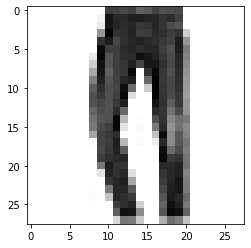

In [ ]:
# Vemos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
#Como hemos vuelto a añadir los datos para ver la imagen, tenemos que transformalos
#otra vez, para hacer las predicciones.
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


Hacemos predicciones sobre la 6º imagen de test en cada modelo utilizando `predcit`

 **Modelo 1**

In [ ]:
import numpy as np
predictions1 = model1.predict(test_images)
print(np.argmax(predictions1[5]))
print(predictions1[5])
np.sum(predictions1[5])
print(predictions1)

1
[9.0428500e-04 9.9732912e-01 7.4370379e-05 1.9804128e-04 1.3934735e-03
 8.0660089e-07 7.7408215e-05 2.9250685e-08 2.2527611e-05 4.1253814e-10]
[[1.0051388e-06 3.6653784e-08 4.6418450e-06 ... 2.1036722e-01
  5.6921178e-03 7.4070346e-01]
 [8.8796508e-04 1.8310000e-07 9.3206322e-01 ... 7.8350970e-10
  1.5992374e-04 2.5751274e-09]
 [3.9517261e-05 9.9991512e-01 1.2424280e-06 ... 1.4184460e-09
  2.7811049e-07 4.9680906e-12]
 ...
 [2.0055450e-02 4.1505356e-07 7.8397105e-04 ... 7.2891803e-06
  9.2326808e-01 2.0901725e-06]
 [3.6971970e-04 9.7227466e-01 8.5507469e-05 ... 9.2856035e-06
  2.2145216e-06 2.1783451e-06]
 [2.1222049e-04 5.1621886e-05 1.0995306e-03 ... 3.6075351e-01
  4.8471533e-02 3.4717850e-02]]


**Modelo 2**

In [ ]:
predictions2 = model2.predict(test_images)
print(np.argmax(predictions2[5]))
print(predictions2[5])
np.sum(predictions2[5])
print(predictions2)

1
[2.7178533e-04 9.9865133e-01 1.9113570e-06 1.3677907e-04 8.9681335e-04
 8.2573376e-07 3.5788471e-05 6.4942363e-08 4.7630756e-06 3.1110872e-08]
[[5.7164743e-06 7.2940600e-07 3.5071475e-06 ... 1.3975832e-01
  5.6094965e-03 8.0057889e-01]
 [5.9310591e-04 4.5399656e-06 9.4841862e-01 ... 9.1612601e-10
  8.0466365e-05 3.3995889e-10]
 [2.7031692e-06 9.9998593e-01 4.8846895e-09 ... 1.3983645e-08
  9.8051380e-08 1.2885967e-09]
 ...
 [1.6038360e-02 3.1710465e-06 7.2526792e-04 ... 6.8561462e-06
  9.3633139e-01 8.3097740e-07]
 [4.3072551e-04 9.5950669e-01 1.7692641e-05 ... 1.5668436e-04
  5.1223389e-05 2.1971757e-05]
 [3.2997955e-04 6.0645340e-05 5.6876376e-04 ... 5.2071452e-02
  4.3854080e-02 4.9031274e-03]]


**Modelo 3**

In [ ]:

predictions3 = model3.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions3[5])
np.sum(predictions3[5])
print(predictions3)

1
[7.3465795e-05 9.9990988e-01 2.3085854e-06 7.8536941e-06 3.7874065e-06
 2.0591233e-07 3.6119997e-07 8.1819756e-08 2.2030547e-06 9.3362973e-10]
[[3.6583072e-07 1.8967945e-08 7.2286213e-08 ... 9.5292361e-04
  4.2260328e-07 9.9900323e-01]
 [7.4344361e-04 1.3430106e-08 9.9895513e-01 ... 2.4984400e-11
  1.5446985e-09 2.1215485e-10]
 [7.4317262e-07 9.9999869e-01 1.4563412e-08 ... 2.9411429e-09
  1.1699911e-08 1.3934519e-11]
 ...
 [3.3047977e-06 1.5478420e-08 7.9878993e-07 ... 6.1919616e-09
  9.9998379e-01 8.6784349e-09]
 [1.5660847e-08 9.9999917e-01 1.7475261e-09 ... 6.3443800e-08
  4.1948684e-11 3.4373571e-10]
 [8.3528990e-03 1.8350763e-04 7.7415875e-04 ... 1.1773795e-01
  7.8529678e-03 2.2971490e-03]]


Podemos observar cómo los 3 modelos predicen correctamente que la imagen 6 de test corresponde con el elemento 1 de nuestro vector de prendas, es decir, unos pantalones

Ahora vamos a graficar las predicciones de la imagen 6 en cada modelo

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

**Modelo 1**

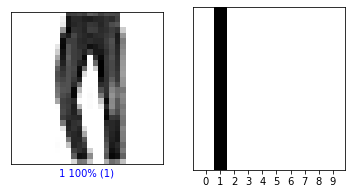

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

**Modelo 2**

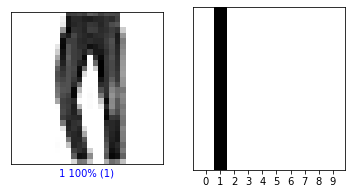

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  test_labels)
plt.show()

**Modelo 3**

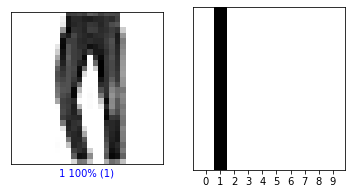

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions3[i],  test_labels)
plt.show()

Para la imagen 6 de los datos de prueba, los tres modelos la predicen con un 100% de seguridad. Tienen una precisión del 100% para ese caso.

Vemos la predicción, igual que el gráfico anterior, de las 14 primeras imágenes del conjunto de test, para cada uno de los casos.

**Modelo 1**

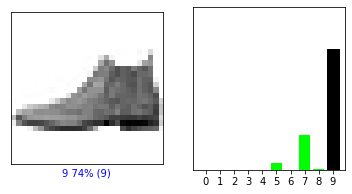

<Figure size 432x288 with 0 Axes>

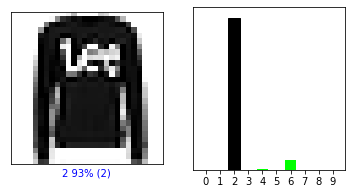

<Figure size 432x288 with 0 Axes>

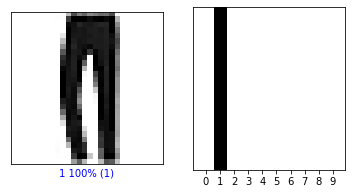

<Figure size 432x288 with 0 Axes>

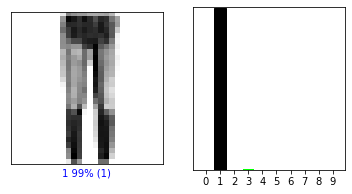

<Figure size 432x288 with 0 Axes>

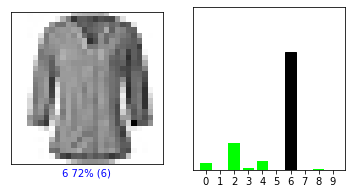

<Figure size 432x288 with 0 Axes>

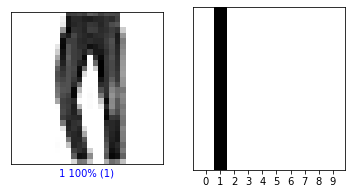

<Figure size 432x288 with 0 Axes>

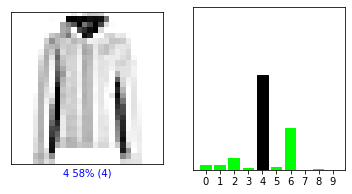

<Figure size 432x288 with 0 Axes>

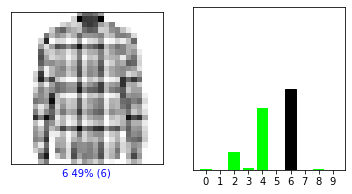

<Figure size 432x288 with 0 Axes>

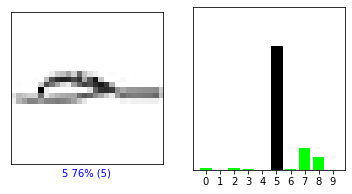

<Figure size 432x288 with 0 Axes>

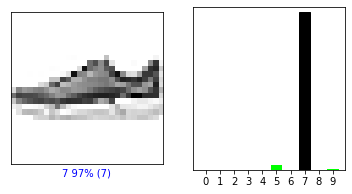

<Figure size 432x288 with 0 Axes>

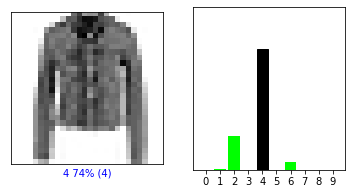

<Figure size 432x288 with 0 Axes>

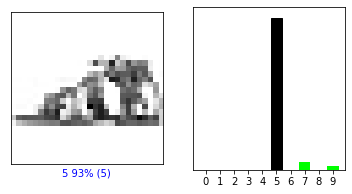

<Figure size 432x288 with 0 Axes>

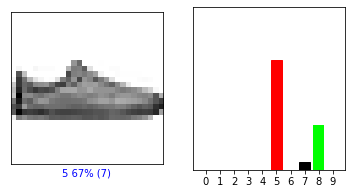

<Figure size 432x288 with 0 Axes>

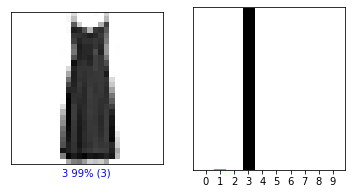

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions1[i],  test_labels)
    plt.show()
    plt.clf()

**Modelo 2**

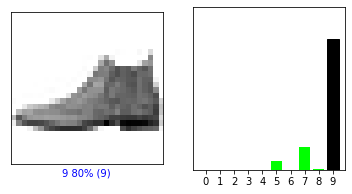

<Figure size 432x288 with 0 Axes>

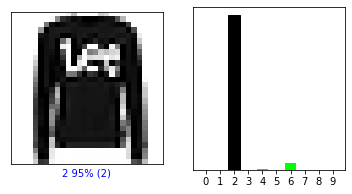

<Figure size 432x288 with 0 Axes>

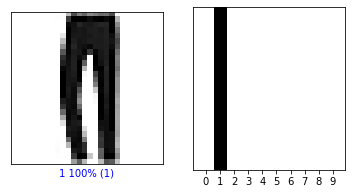

<Figure size 432x288 with 0 Axes>

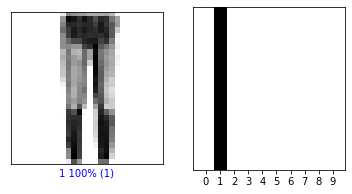

<Figure size 432x288 with 0 Axes>

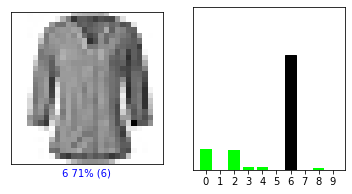

<Figure size 432x288 with 0 Axes>

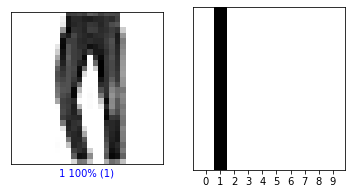

<Figure size 432x288 with 0 Axes>

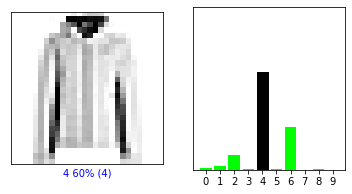

<Figure size 432x288 with 0 Axes>

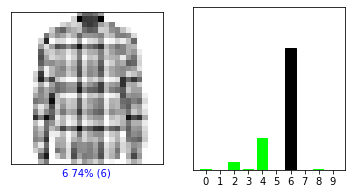

<Figure size 432x288 with 0 Axes>

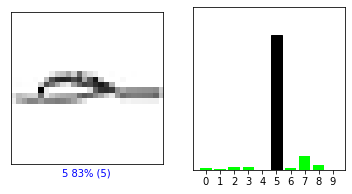

<Figure size 432x288 with 0 Axes>

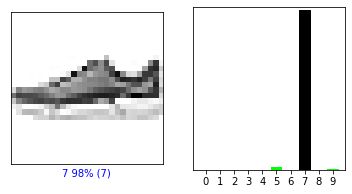

<Figure size 432x288 with 0 Axes>

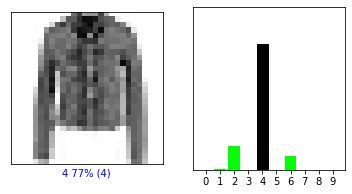

<Figure size 432x288 with 0 Axes>

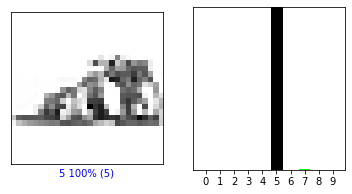

<Figure size 432x288 with 0 Axes>

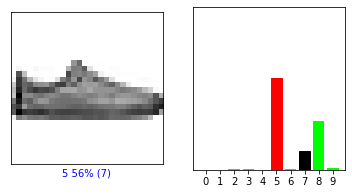

<Figure size 432x288 with 0 Axes>

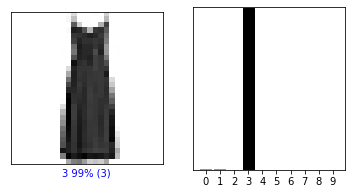

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions2[i],  test_labels)
    plt.show()
    plt.clf()

**Modelo 3**

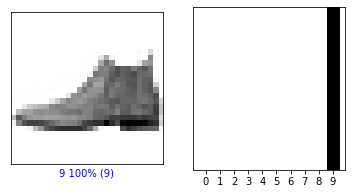

<Figure size 432x288 with 0 Axes>

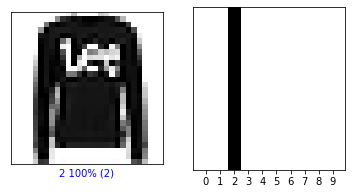

<Figure size 432x288 with 0 Axes>

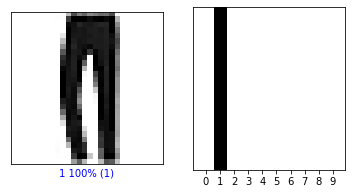

<Figure size 432x288 with 0 Axes>

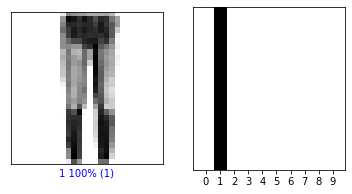

<Figure size 432x288 with 0 Axes>

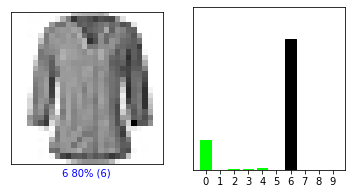

<Figure size 432x288 with 0 Axes>

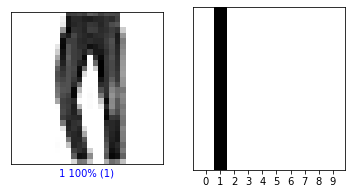

<Figure size 432x288 with 0 Axes>

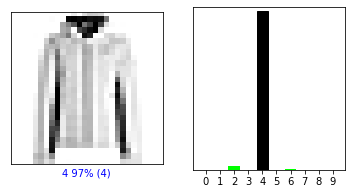

<Figure size 432x288 with 0 Axes>

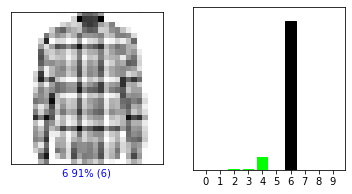

<Figure size 432x288 with 0 Axes>

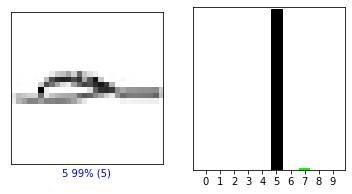

<Figure size 432x288 with 0 Axes>

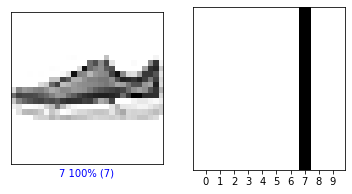

<Figure size 432x288 with 0 Axes>

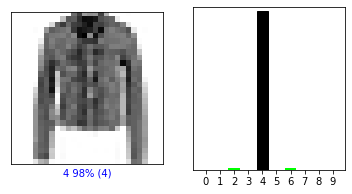

<Figure size 432x288 with 0 Axes>

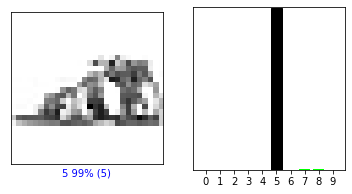

<Figure size 432x288 with 0 Axes>

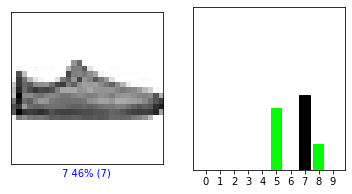

<Figure size 432x288 with 0 Axes>

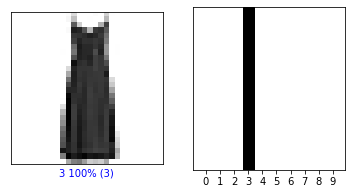

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions3[i],  test_labels)
    plt.show()
    plt.clf()

Observamos que los tres modelos se confunden en la imagen de las zapatillas, no saben clasificarla correctamente.

Esto se puede deber a :
- No tener en los datos de entrenamiento ninguna imagen que corresponda con la etiqueta asociada a zapatilla (7)

- La imagen tiene un "formato" diferente a todas las demás, es decir, esta girada


## **DROPOUT**

Dropout es una de las técnicas de regularización más efectivas 

Aplicar dropout a una capa consiste en retirar (poner a cero) 
aleatoriamente un número de características de salida de la 
capa durante el entrenamiento.

La “tasa de dropout” es la proporción de características que se 
ponen a 0 (entre 0.2 a 0.5)

Durante la prueba, no se retira ninguna característica. En su lugar, 
los valores de salida de la capa se reducen en un factor que es la “tasa de dropout” (para equilibrar que haya más neuronas activas que en el entrenamiento).

Añadimos dropout, en un modelo como el Modelo 1, en cada capa con una tasa igual a 0.5

In [ ]:
from keras import layers
from keras import models
modelD = Sequential()
modelD.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelD.add(layers.Dropout(0.5))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Conv2D(64, (5, 5), activation='relu'))
modelD.add(layers.Dropout(0.5))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Flatten())
modelD.add(layers.Dropout(0.5))
modelD.add(Dense(10, activation='softmax'))
modelD.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                 

In [ ]:
modelD.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

modelD.fit(train_images, train_labels, epochs=5, batch_size=100)

test_lossD, test_accD = modelD.evaluate(test_images, test_labels)

print('Test accuracy:', test_accD)

Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 1.0731 - accuracy: 0.6085
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6932 - accuracy: 0.7411
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6238 - accuracy: 0.7680
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5856 - accuracy: 0.7835
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.8192 - accuracy: 0.8257
Test accuracy: 0.8256999850273132


## **BatchNormalization**

Capa que normaliza sus entradas.

La normalización por lotes realiza una transformación que mantiene la media cerca de 0 y la desviación estándar de salida cerca de 1.

Durante el entrenamiento, la capa normaliza su salida utilizando la media y la desviación estándar del lote actual de entradas.

Durante la prueba, la capa normaliza su salida utilizando una media móvil de la media y la desviación estándar de los lotes que ha visto durante el entrenamiento,

Añadimos BatchNormalization, en un modelo como el Modelo 1, en cada capa


In [ ]:
from keras import layers
from keras import models
from tensorflow.keras.layers import BatchNormalization
modelB = Sequential()
modelB.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelB.add(BatchNormalization())
modelB.add(MaxPooling2D((2, 2)))

modelB.add(Conv2D(64, (5, 5), activation='relu'))
modelB.add(BatchNormalization())
modelB.add(MaxPooling2D((2, 2)))

modelB.add(Flatten())
modelB.add(BatchNormalization())
modelB.add(Dense(10, activation='softmax'))
modelB.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 64)         256       
 hNormalization)                                                 
                                                      

In [ ]:
modelB.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

modelB.fit(train_images, train_labels, epochs=5, batch_size=100)

test_lossB, test_accB = modelB.evaluate(test_images, test_labels)

print('Test accuracy:', test_accB)

Epoch 1/5
600/600 [==============================] - 6s 8ms/step - loss: 0.4881 - accuracy: 0.8273
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3431 - accuracy: 0.8781
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3002 - accuracy: 0.8922
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2752 - accuracy: 0.9027
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3041 - accuracy: 0.8924
Test accuracy: 0.8924000263214111


## **Callbacks API**
Una "callback" o devolución de llamada es un objeto que puede realizar acciones en varias etapas del entrenamiento (por ejemplo, al comienzo o al final de una época, antes o después de un solo lote, etc.).

Puede usar devoluciones de llamada para:

 

*   Escribir registros de TensorBoard después de cada lote de entrenamiento     para monitorear sus métricas
*   Guarde periódicamente el modelo en el disco
*   Hacer paradas tempranas
*   Obtener una vista de los estados internos y las estadísticas de un modelo durante el entrenamiento
*   etc


*   **Creamos un modelo implementando callback**
 
 Utilizamos callback para entrenar un modelo igual al Modelo 2

In [ ]:
modelnuevo = Sequential()
modelnuevo.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
modelnuevo.add(MaxPooling2D((2, 2)))

modelnuevo.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelnuevo.add(MaxPooling2D((2, 2)))

modelnuevo.add(Flatten())
modelnuevo.add(Dense(65, activation='relu'))
modelnuevo.add(Dense(10, activation='softmax'))
modelnuevo.summary()


modelnuevo.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


modelnuevo.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          callbacks=[callback])

test_loss, test_acc = modelnuevo.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 65)               

Usamos el callback de **LearningRateScheduler**

Al comienzo de cada época, esta devolución de llamada obtiene el valor de tasa de aprendizaje actualizado de la función scheduler, con la época actual y la tasa de aprendizaje actual, y aplica la tasa de aprendizaje actualizada en el optimizador.

Esto quiere decir que va variando el learning rate, en nuestro caso, disminuye 0,1 en cada época.

Aún variando la tasa de aprendizaje en cada iteración, vemos que el resultado no mejora significativamente.

##Matriz confusión

In [ ]:
#import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels)

- **Matriz del modelo 1**

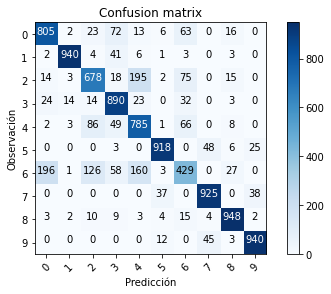

In [ ]:
Y_pred1 = model1.predict(test_images)
Y_pred_classes1 = np.argmax(Y_pred1, axis = 1) 
Y_true1 = np.argmax(test_labels, axis = 1) 
confusion_mtx1 = confusion_matrix(Y_true1, Y_pred_classes1) 
plot_confusion_matrix(confusion_mtx1, classes = range(10))

Como vemos, la mayoria de las imagenes las predice correctamente, de ahí que los **valores más altos** los obtengamos en la **diagonal**. 

Si nos fijamos, de 1000 casos, 429 veces predice bien la imagen 6, pero 196 la confunde con la imagen que corresponde a la etiqueta 0. Esto es, confunde camisas (6) con camisetas (0), lo cuál es lógico y entendible. También, de 1000, 160 las confunde con abrigos (4), 126 con jerseys (2) y 58 con vestidos (3)

- **Matriz modelo 2**

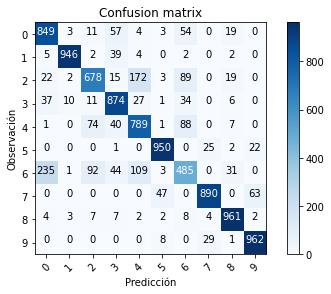

In [ ]:
Y_pred2 = model2.predict(test_images)
Y_pred_classes2 = np.argmax(Y_pred2, axis = 1) 
Y_true2 = np.argmax(test_labels, axis = 1) 
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2) 
plot_confusion_matrix(confusion_mtx2, classes = range(10))

Vemos que mantiene los valores más altos en la diagonal, es decir, predice correctamente la mayoría de las veces.

Además de confundir también camisas con camisetas, jerseys y abrigos, de 1000, confunde 172 veces jerseys (2) con abrigos (4).


- **Matriz modelo 3**

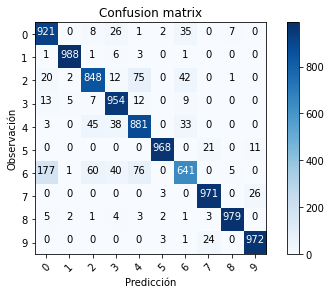

In [ ]:
Y_pred3 = model3.predict(test_images)
Y_pred_classes3 = np.argmax(Y_pred3, axis = 1) 
Y_true3 = np.argmax(test_labels, axis = 1) 
confusion_mtx3 = confusion_matrix(Y_true3, Y_pred_classes3) 
plot_confusion_matrix(confusion_mtx3, classes = range(10))

Podemos ver que sigue la misma línea que los modelos anteriores, confundiendo camisas, camisetas, jerseys y abrigos

Algo destacable de este modelo es que excepto en las predicciones de la imagen 6, las demás predicciones las acierta con valores muy altos, cercanos a 1000. 
En cambio, los otros dos modelos, a pesar de tener los valores más altos en la diagonal, eran menores que estos del modelo 3.

Esta precisión tan alta se debe al optimizador que usa éste, que como ya hemos visto se trata del optimizador *adam*


## **Conclusiones**

Nos damos cuenta que usando el optimizador **Adam** mejora notablemente los resultados en cuanto a precisión y pérdida de nuestros modelos. Se debe a que combina varias ventajas de dos optimizadores que por separado ya dan buenos resultados.

En cuanto a diferencias entre usar redes neuronales y redes de neuronas convolucionales, si comparamos un modelo de redes neuronales que usaba optimizador sgd y función de activación relu (modelo 5- práctica 1) con otro modelo de redes convolucionales con las mismas características (modelo 1) y función de activación relu  vemos que obtenemos unos resultados muy parecidos, no vemos grandes mejoras.



